In [4]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to display images - 5 columns and number of raws according to 'n' parameter

In [23]:
current_dir = os.getcwd()
def print_random_n_images_in_directory(directory, n, axis = False, random=True):
    images = os.listdir(directory)
    images = sorted(images)
    images = np.random.choice(images, n) if random else images[:n]
    cols = 5
    rows = n // 5
    if n % 5 != 0:
        rows += 1
    _, axs = plt.subplots(rows, cols, figsize=(15, 15))
    for i, img_name in enumerate(images):
        img = cv2.imread(f"{directory}/{img_name}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i // 5, i % 5].imshow(img)
        axs[i // 5, i % 5].set_title(img_name)
        if not axis:
            axs[i // 5, i % 5].axis('off')
    plt.show()


        
        

# Starting point
First of all we had to gather the datasets. WE have found 2 datasets:
- https://github.com/HybridShivam/Pokemon/tree/master/assets/images - public github repositorium with 1172 images in png format, all with black backgrund
- https://www.kaggle.com/datasets/hlrhegemony/pokemon-image-dataset - dataset from Kaggle - dataset with around 900 folders with few images inside each. All folders contain aggregatively 2503 images. Images had white background and they were in jpg format
  
  
After getting the data we had to merge these 2 folders and change images' format to the same - we chose jpg, as it is lighter and still good.

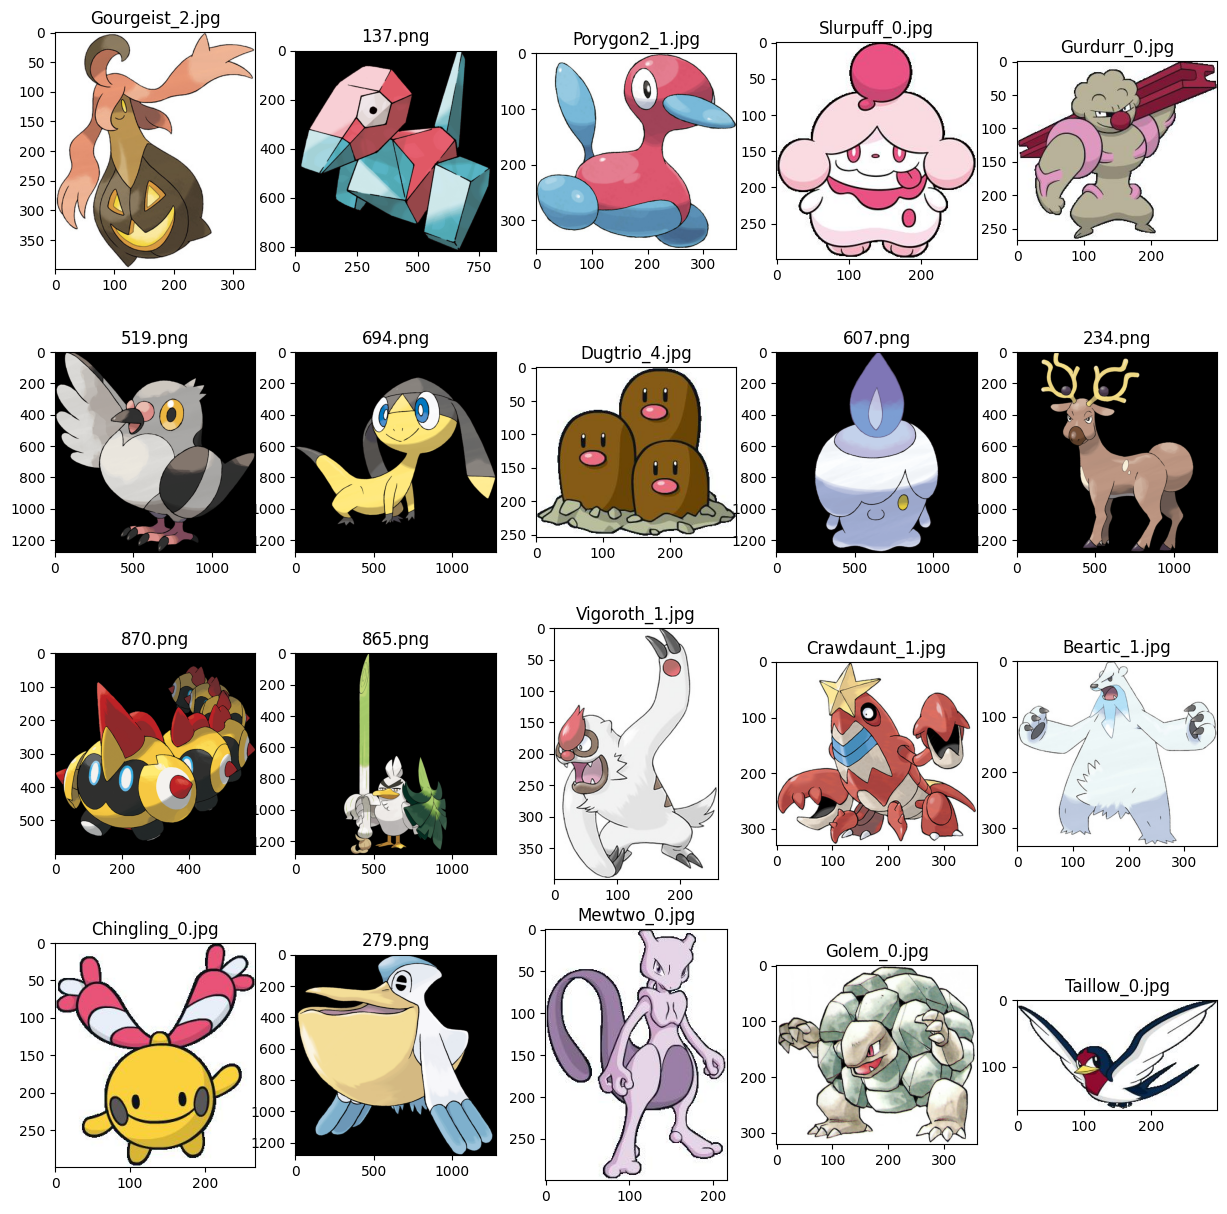

In [24]:
all_starting_pokemons_dir = current_dir + '/pokemons'

print_random_n_images_in_directory(all_starting_pokemons_dir, 20, True)

# Image normalization
Every image should be the same size and similar in style. We resized all images firstly to 512x512 format, but after discussion we decided to decrease it to 256x256 pixels so the model training goes faster. Some of the images did not have a square-like shape, but a rectangular one so after resizing it it might look quite strange, but there are only few pokemons like that so it should not mess the training process.

Below images in 512x512 format are shown.

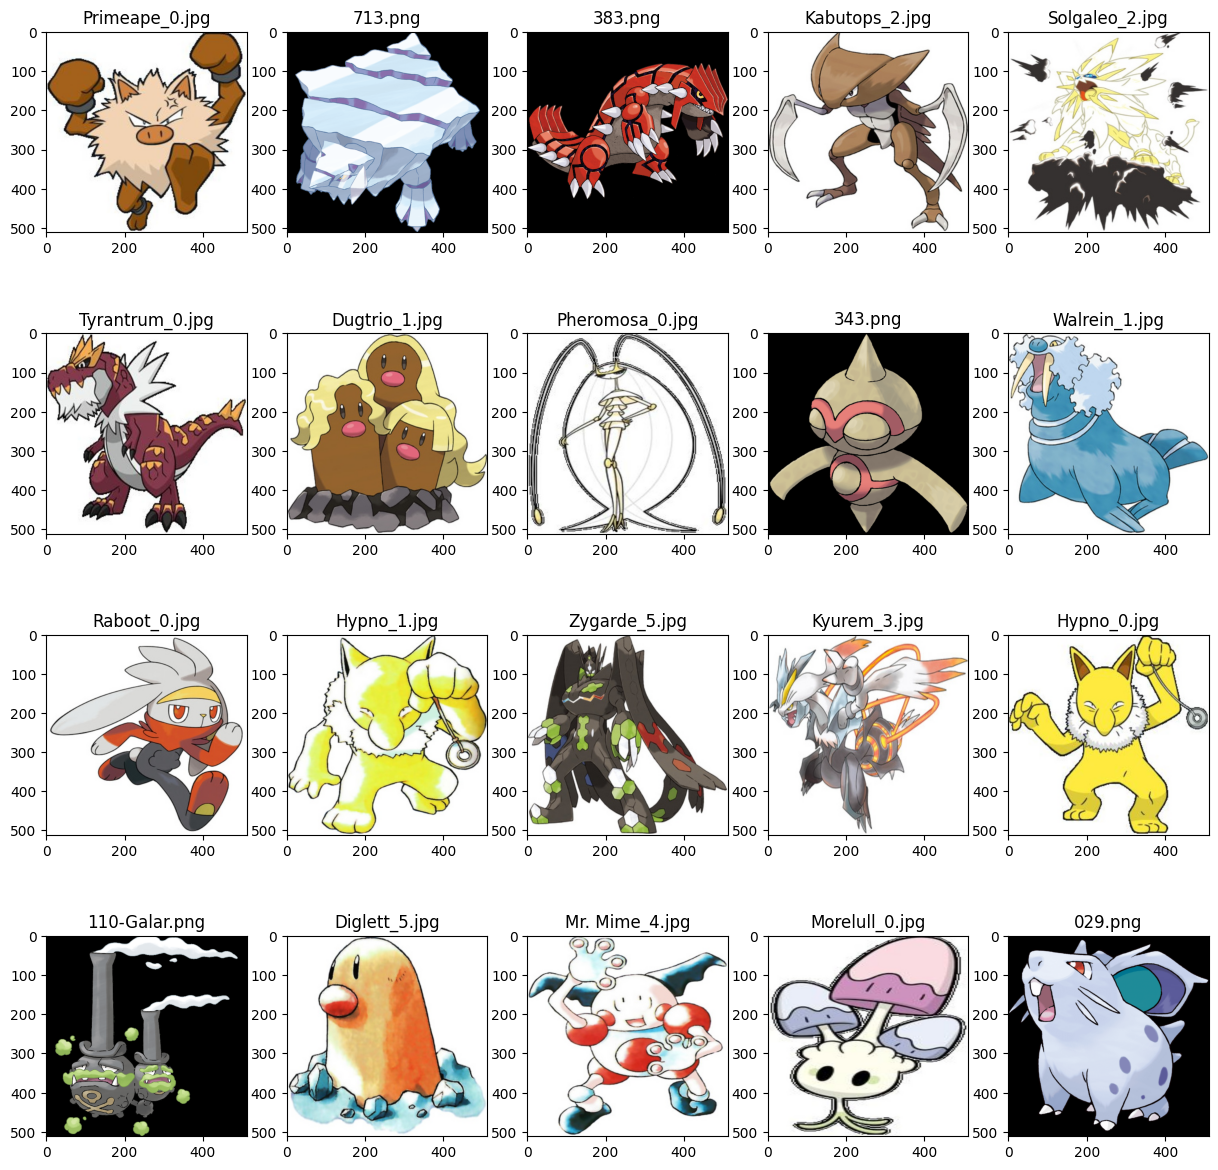

In [25]:
pokemons_resized_dir = current_dir + '/pokemons_resized_512'
print_random_n_images_in_directory(pokemons_resized_dir, 20, True)

# Normalization - continuation

Convolutional Neural Networks (used in GANs) are most sensitive to bright colors (as they have the highest value, close to 255). Some images had white background which could mess up the training. We have tried to change every image background into black using `cv2.findContours` function and it worked quite well, but some pokemons like Conkeldurr ( shown below at 2nd row, 3rd col ) has some white artifacts inside its model which is hard to remove. 

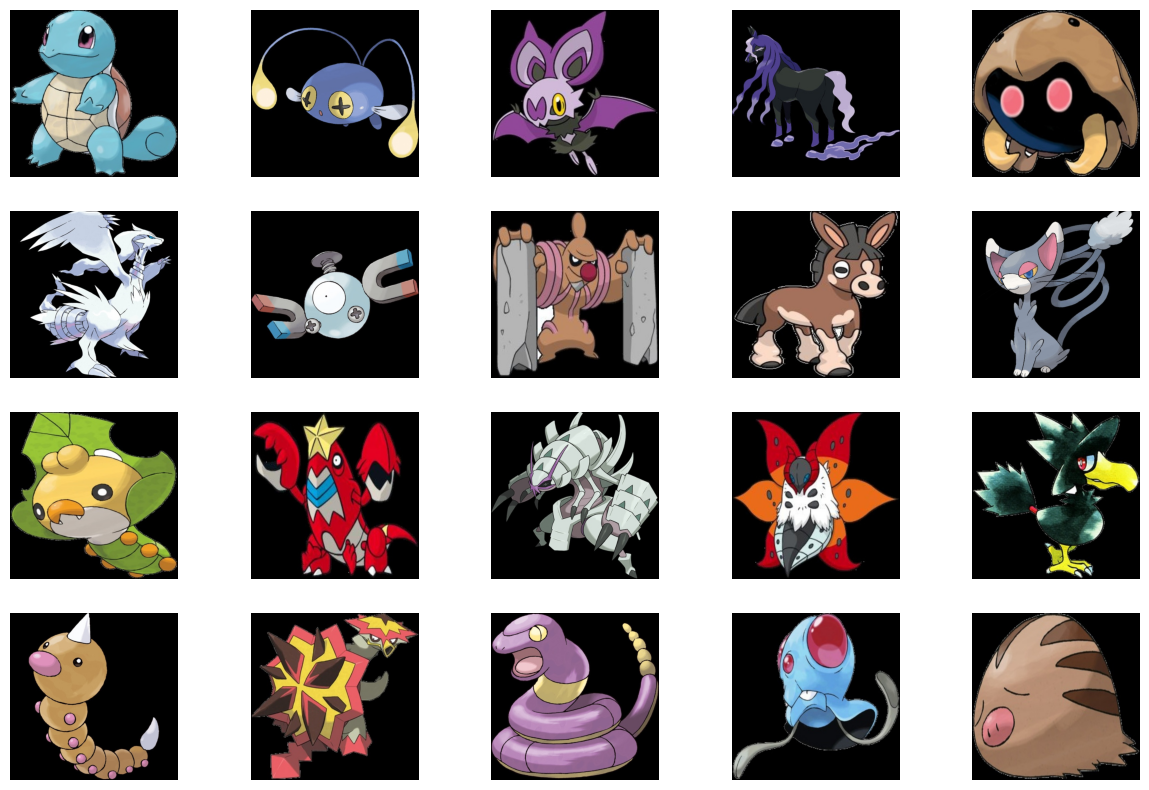

In [33]:
pokemons_black_background = current_dir + '/pokemons_black_background'
print_random_n_images_in_directory(pokemons_black_background, 20)

# Data augmentation

After initial image processing we still had only ~3500 images which is quite a low number to train a Gen AI model. The smallest repositorium we have found had around 14_000 images in its dataset. That's where we had to use a technique called **data augmentation**. It's a process of increasing size of dataset by adding noise, reflection, flips, scaling, contrast or other features to the original data. 

## Image relfection
We created a mirror reflection (horizontally) of each pokemon - it doubled our dataset up to 7000 images

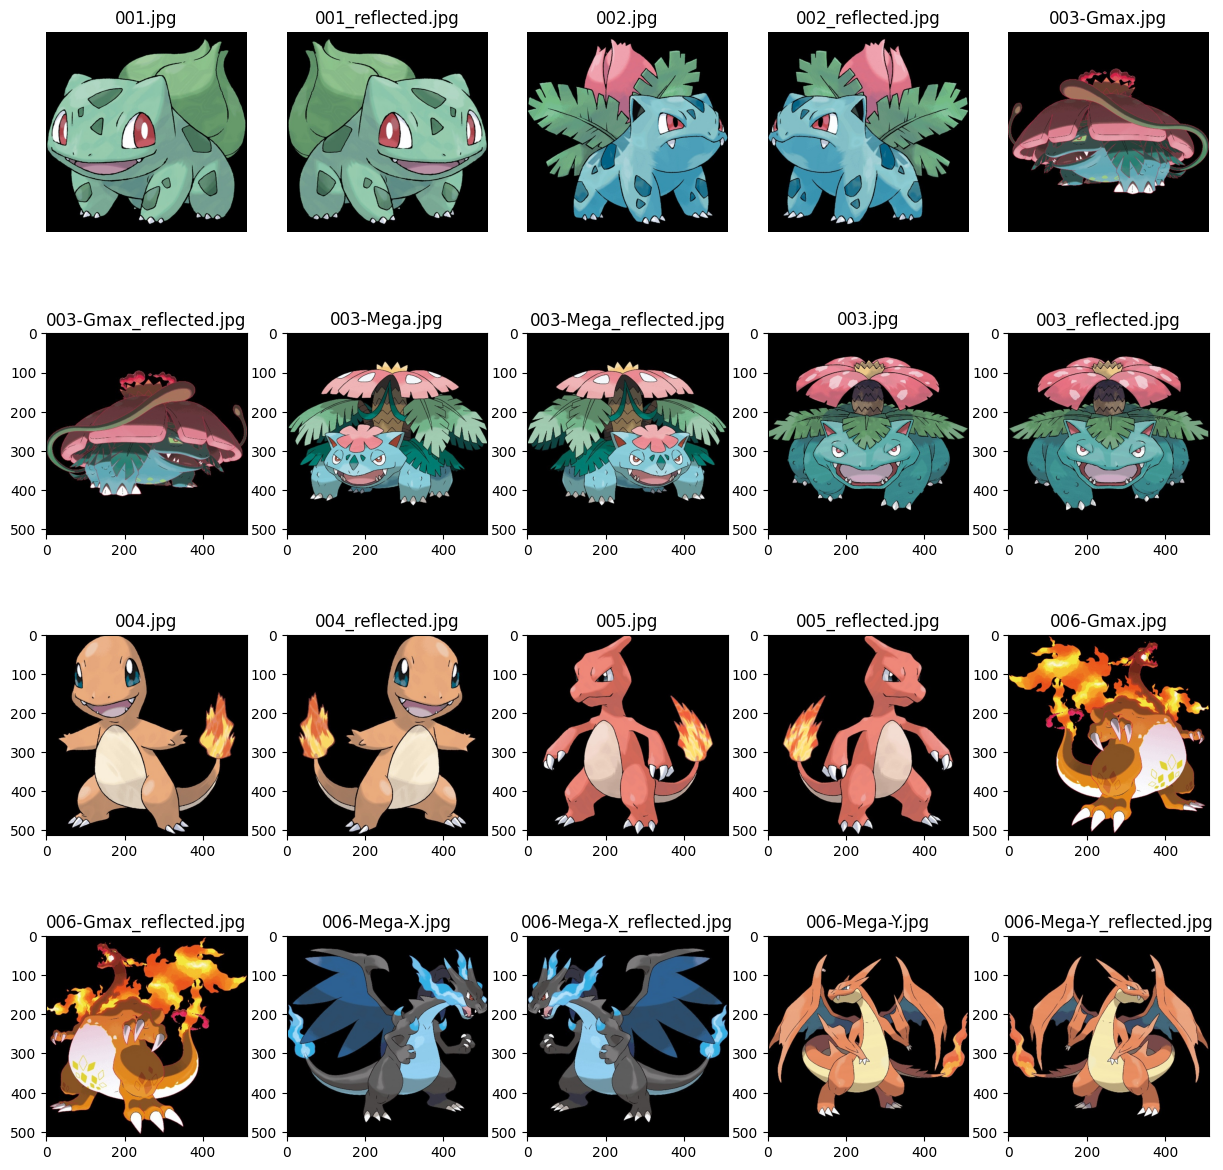

In [26]:
refelcted_pokemons = current_dir + '/pokemons_mirror_reflection'
print_random_n_images_in_directory(refelcted_pokemons, 20, False, False)


## Adding contrast
Second step included increasing contrast by 30 % of each image (both original and reflected), which also doubled our dataset. 

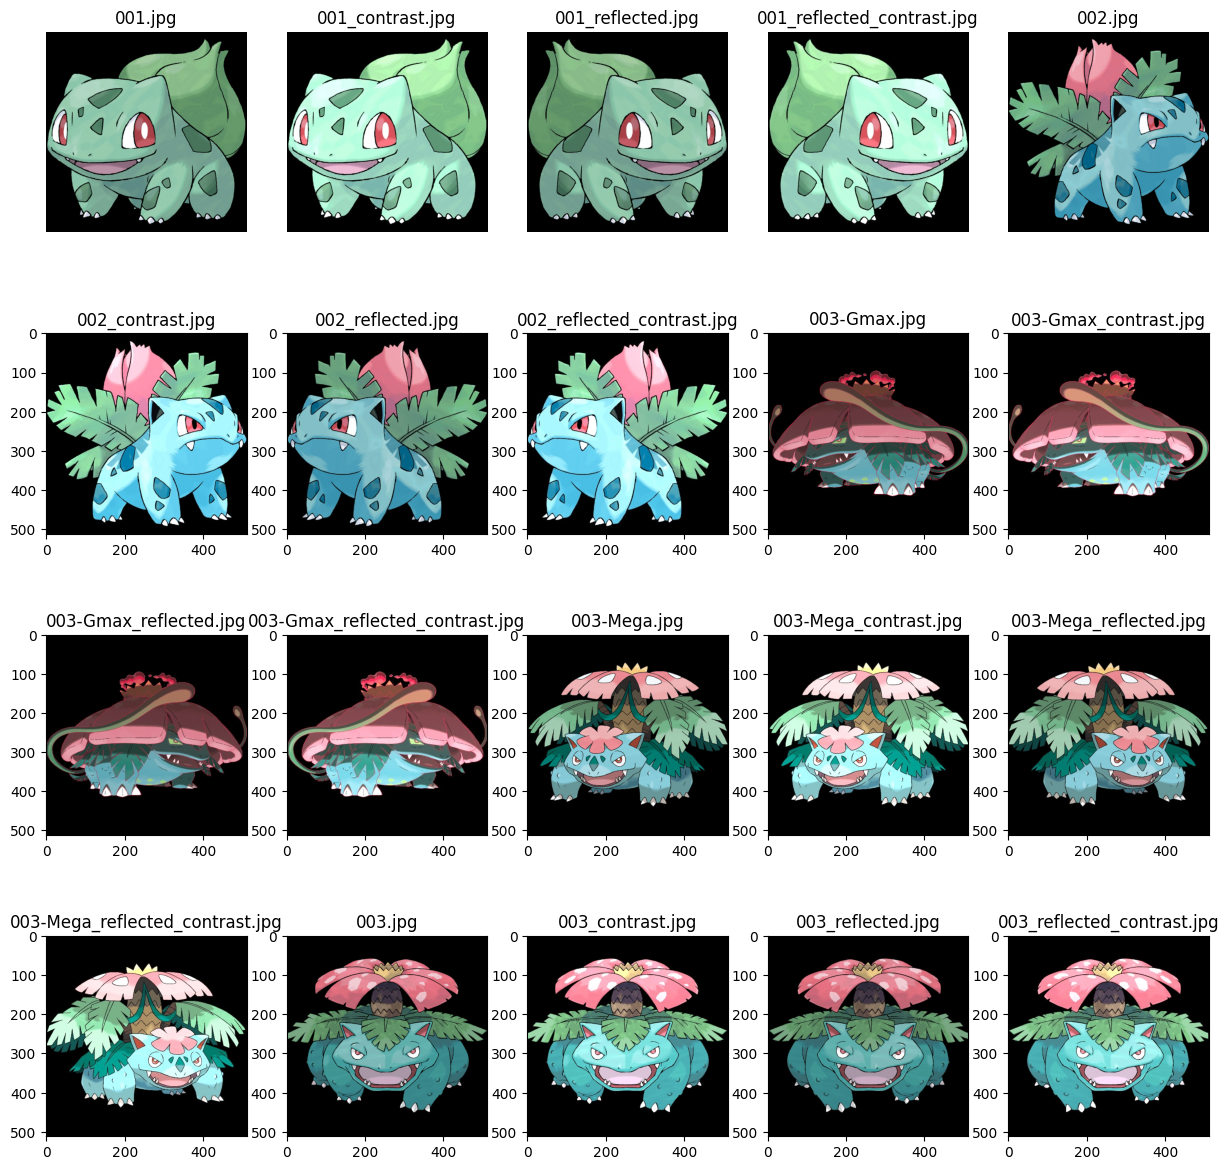

In [27]:
pokemons_contrast = current_dir + '/pokemons_contrast'
print_random_n_images_in_directory(pokemons_contrast, 20, False, False)

## Adding noise
In the final step, we add a gaussian noise to each image. The noise can't be seen in RGB format - example below 

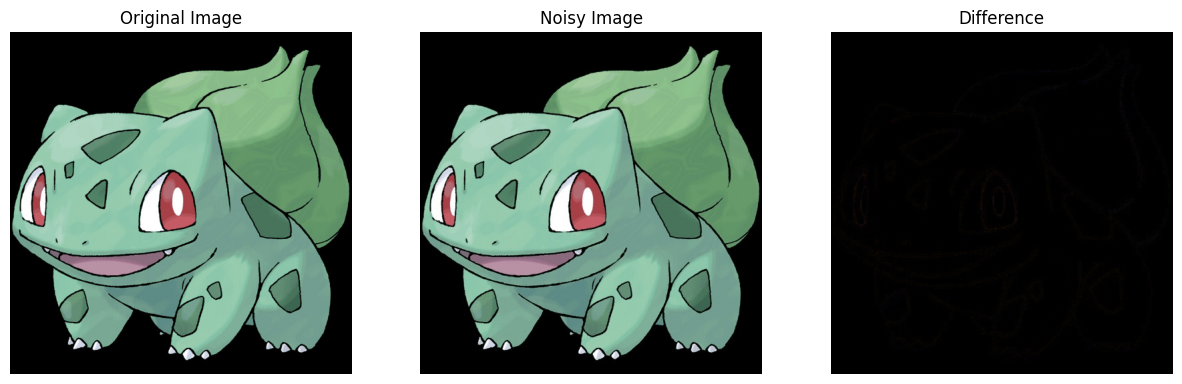

In [37]:
path_to_noise_dataset = current_dir + '/pokemons_noise'
first_image = cv2.imread(f"{path_to_noise_dataset}/001.jpg")
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
second_image = cv2.imread(f"{path_to_noise_dataset}/001_noisy.jpg", cv2.COLOR_BGR2RGB)
second_image = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB)
# Compute absolute difference for each channel
diff_r = cv2.absdiff(first_image[:, :, 0], second_image[:, :, 0])
diff_g = cv2.absdiff(first_image[:, :, 1], second_image[:, :, 1])
diff_b = cv2.absdiff(first_image[:, :, 2], second_image[:, :, 2])
# Compute the total difference
image_diff = cv2.merge([diff_r, diff_g, diff_b])

_, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(first_image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(second_image)
axs[1].set_title('Noisy Image')
axs[1].axis('off')
axs[2].imshow(image_diff)
axs[2].set_title('Difference')
axs[2].axis('off')
plt.show()

But when we change images to grayscale and we perform the same operation we can see that the noise is really there. Still not visible for human eye on the refactored image, but when the differance is calculated and shown as below, we can see the noise works!

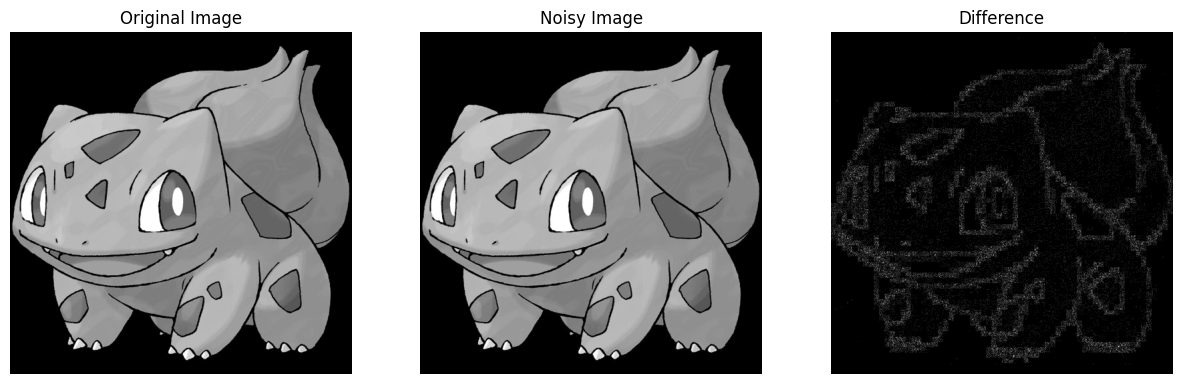

In [35]:
path_to_noise_dataset = current_dir + '/pokemons_noise'
first_image = cv2.imread(f"{path_to_noise_dataset}/001.jpg", cv2.IMREAD_GRAYSCALE)
second_image = cv2.imread(f"{path_to_noise_dataset}/001_noisy.jpg", cv2.IMREAD_GRAYSCALE)
image_diff = cv2.absdiff(first_image, second_image).astype(np.uint8)

_, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(first_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(second_image, cmap='gray')
axs[1].set_title('Noisy Image')
axs[1].axis('off')
axs[2].imshow(image_diff, cmap='gray')
axs[2].set_title('Difference')
axs[2].axis('off')
plt.show()

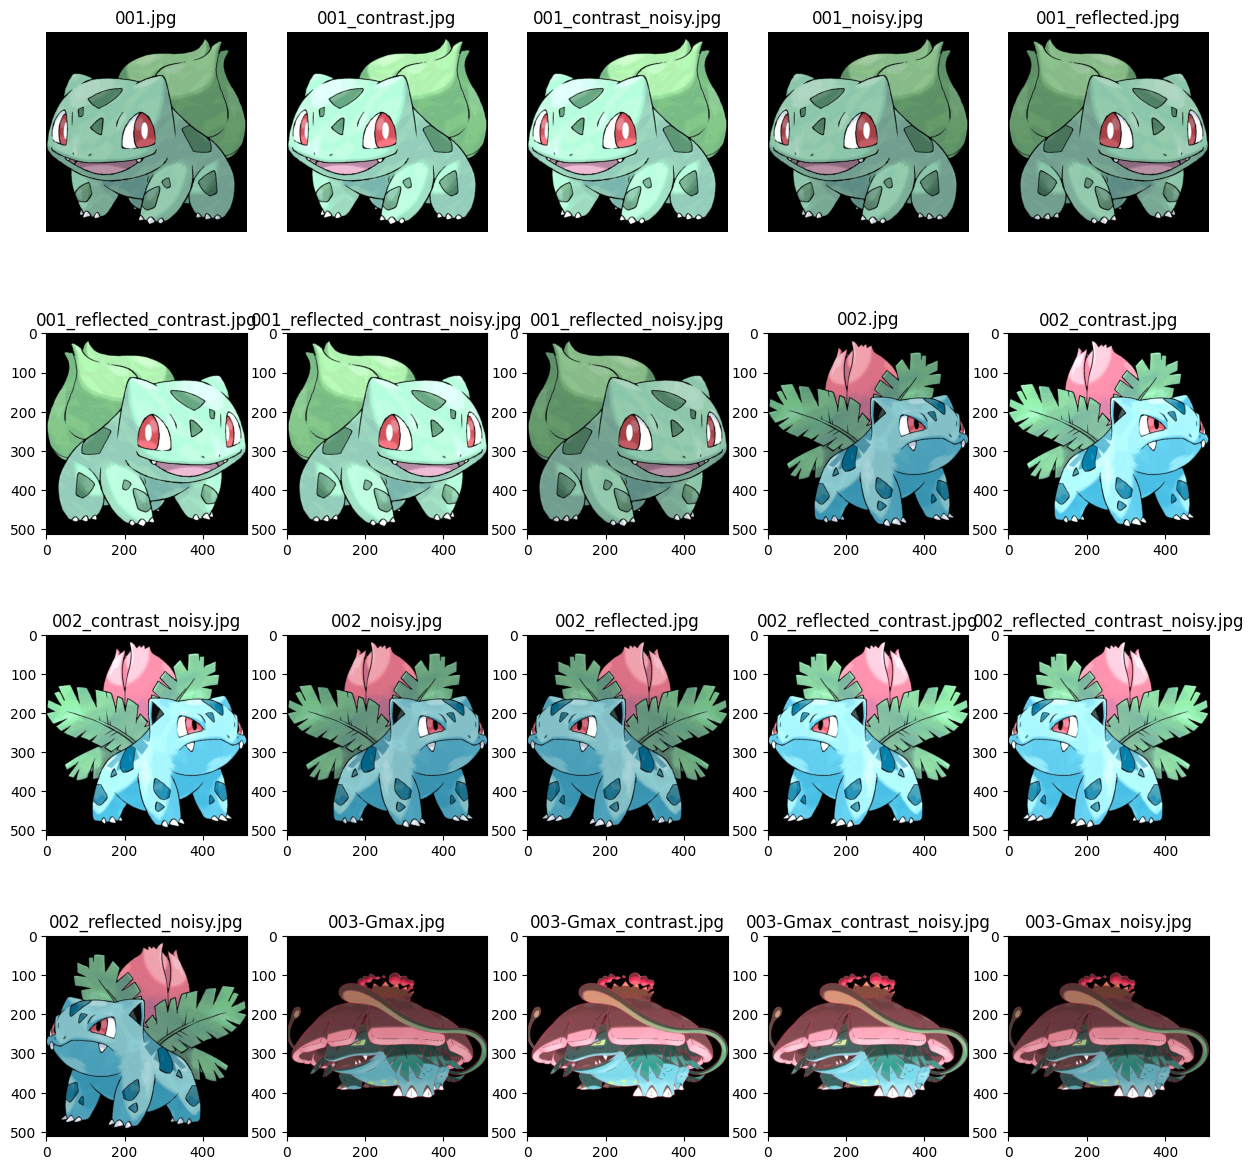

In [29]:
pokemons_noise = current_dir + '/pokemons_noise'
print_random_n_images_in_directory(pokemons_noise, 20, False, False)